In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import numpy as np

# Подзадача 1
Загрузите датасет и ознакомьтесь с ним

In [2]:
df = pd.read_csv("vehicles_dataset_upd.csv")
df

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,toyota,rav4,gas,150000,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,low,2021-04-10 20:33:57+00:00
9864,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,jeep,wrangler,gas,113573,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,medium,2021-05-03 13:36:30+00:00
9865,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,audi,a3 2.0t premium plus pzev,gas,150184,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low,2021-04-22 19:14:01+00:00
9866,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,porsche,cayenne,hybrid,61943,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high,2021-04-14 14:14:42+00:00


# Подзадача 2 и 3
Исследуйте данные на аномальные значения и скорректируйте выбросы

Постройте график для количественных переменных

## Исследование аномальных значений

In [3]:
def draw_boxplot(df, columns):
    plt.figure(figsize=(15, 25))
    for i, column in enumerate(columns):
        ax = plt.subplot(len(columns), 1, i + 1)

        plt.boxplot(df[column], vert=False)
        plt.title(f"Boxplot для колонки {column}")

        ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))

        plt.xlabel(f"Значение {column}")

    plt.show()

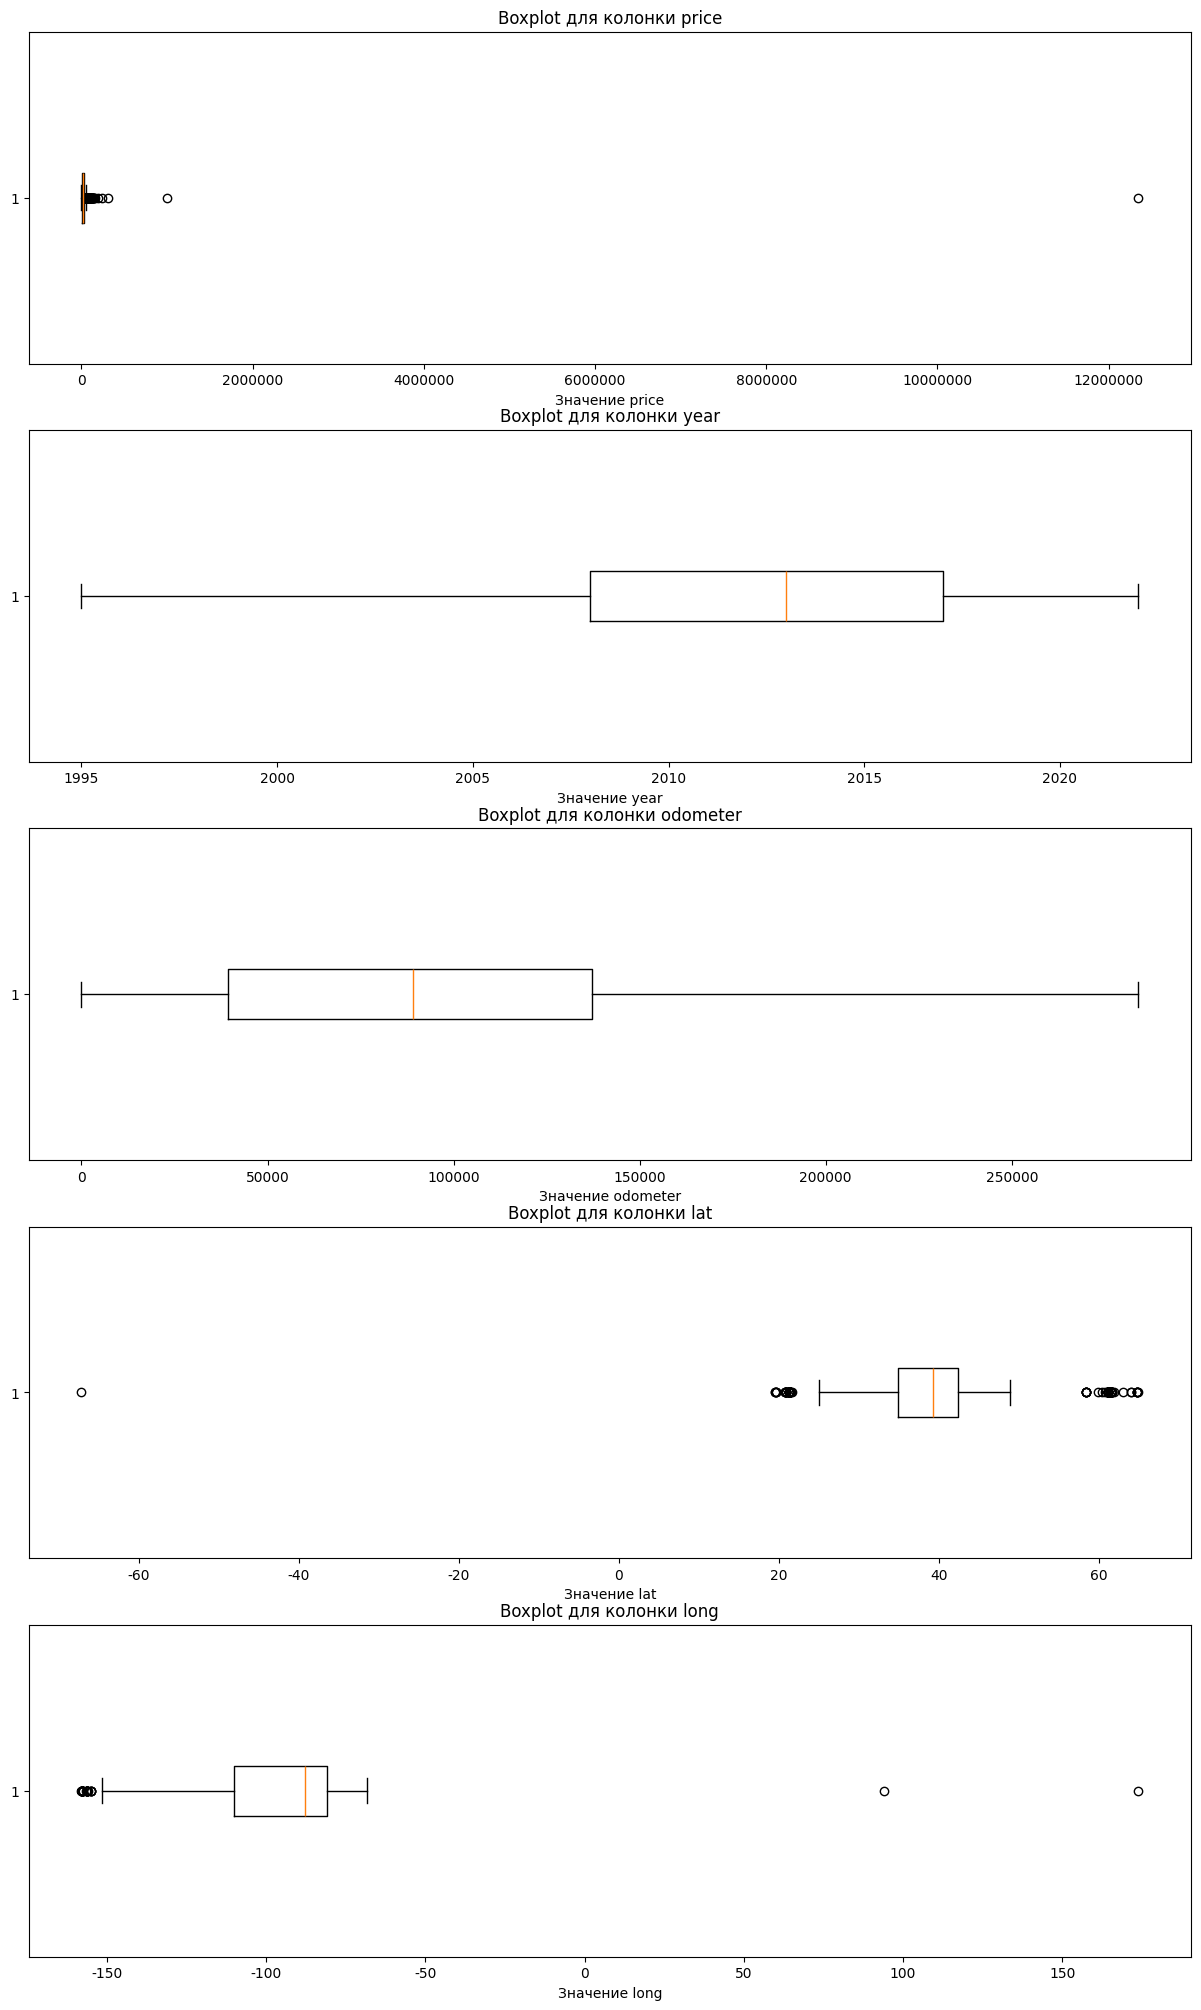

In [4]:
columns = ["price", "year", "odometer", "lat", "long"]

draw_boxplot(df, columns)

## Коррекция

In [5]:
def calc_bounds(column):
    q25 = column.quantile(0.25)
    q75 = column.quantile(0.75)

    iqr = q75 - q25

    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr

    return lower_bound, upper_bound

Как видим из прошлого пункта, выбросы в колонках 'price', 'lat', 'long'.

Обработаем их

In [6]:
for column in ['price', 'lat', 'long']:
    """Выбросы именно в них
    """
    l, u = calc_bounds(df[column])
    df[column] = np.where(df[column] < l, l, df[column])
    df[column] = np.where(df[column] > u, u, df[column])

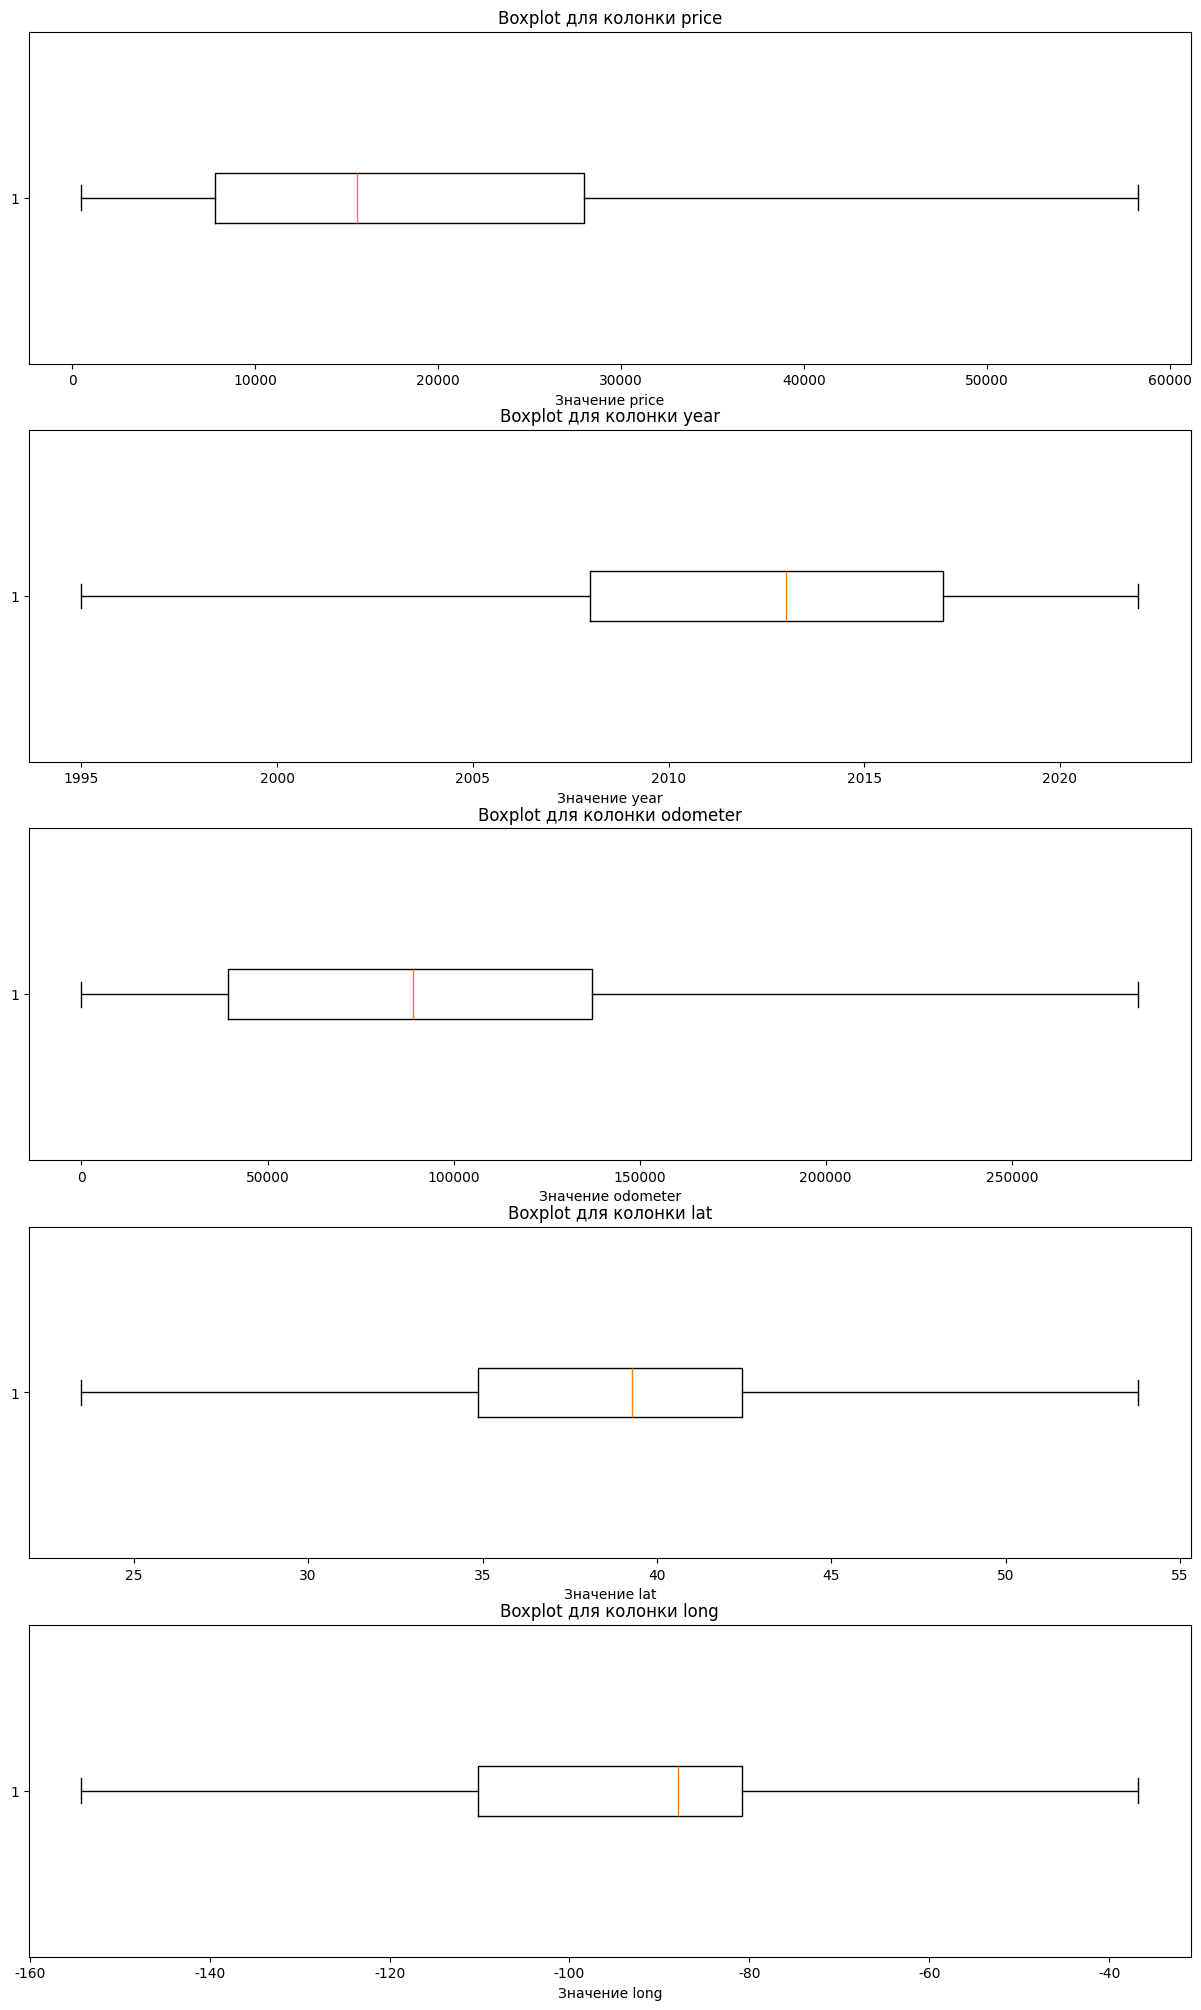

In [7]:
draw_boxplot(df, columns)

# Подзадача 4
Постройте график для категориальных переменных

In [8]:
def draw_categorial_boxplot(df, columns, aliases, x_names):
    plt.figure(figsize=(20, 35))
    for i, col in enumerate(columns):
        plt.subplot(len(columns), 1, i + 1)

        stats = df.groupby([col], as_index=False)[["id"]].count()
        stats = stats.rename(columns={"id": "count"})

        plt.xticks(rotation=60, ha="center")

        plt.ylabel("Количество заявок")
        plt.xlabel(x_names[i])

        plt.bar(stats[col], stats["count"])
        plt.title(f"Распределение заявок по {aliases[i]}")

    plt.show()

In [9]:
def draw_categorial_pie(df, columns, aliases):
    plt.figure(figsize=(22, 22))
    for i, col in enumerate(columns):
        plt.subplot(len(columns) // 2 + len(columns) % 2, 2, i + 1)

        stats = df.groupby([col], as_index=False)[["id"]].count()
        stats = stats.rename(columns={"id": "count"})

        plt.pie(
            stats["count"],
            labels=stats[col],
            labeldistance=None,
            autopct="%1.0f%%",
            textprops={"color": "black"},
            wedgeprops=dict(edgecolor="white"),
        )
        plt.title(f"Распределение заявок по {aliases[i]}")
        plt.legend()

    plt.show()

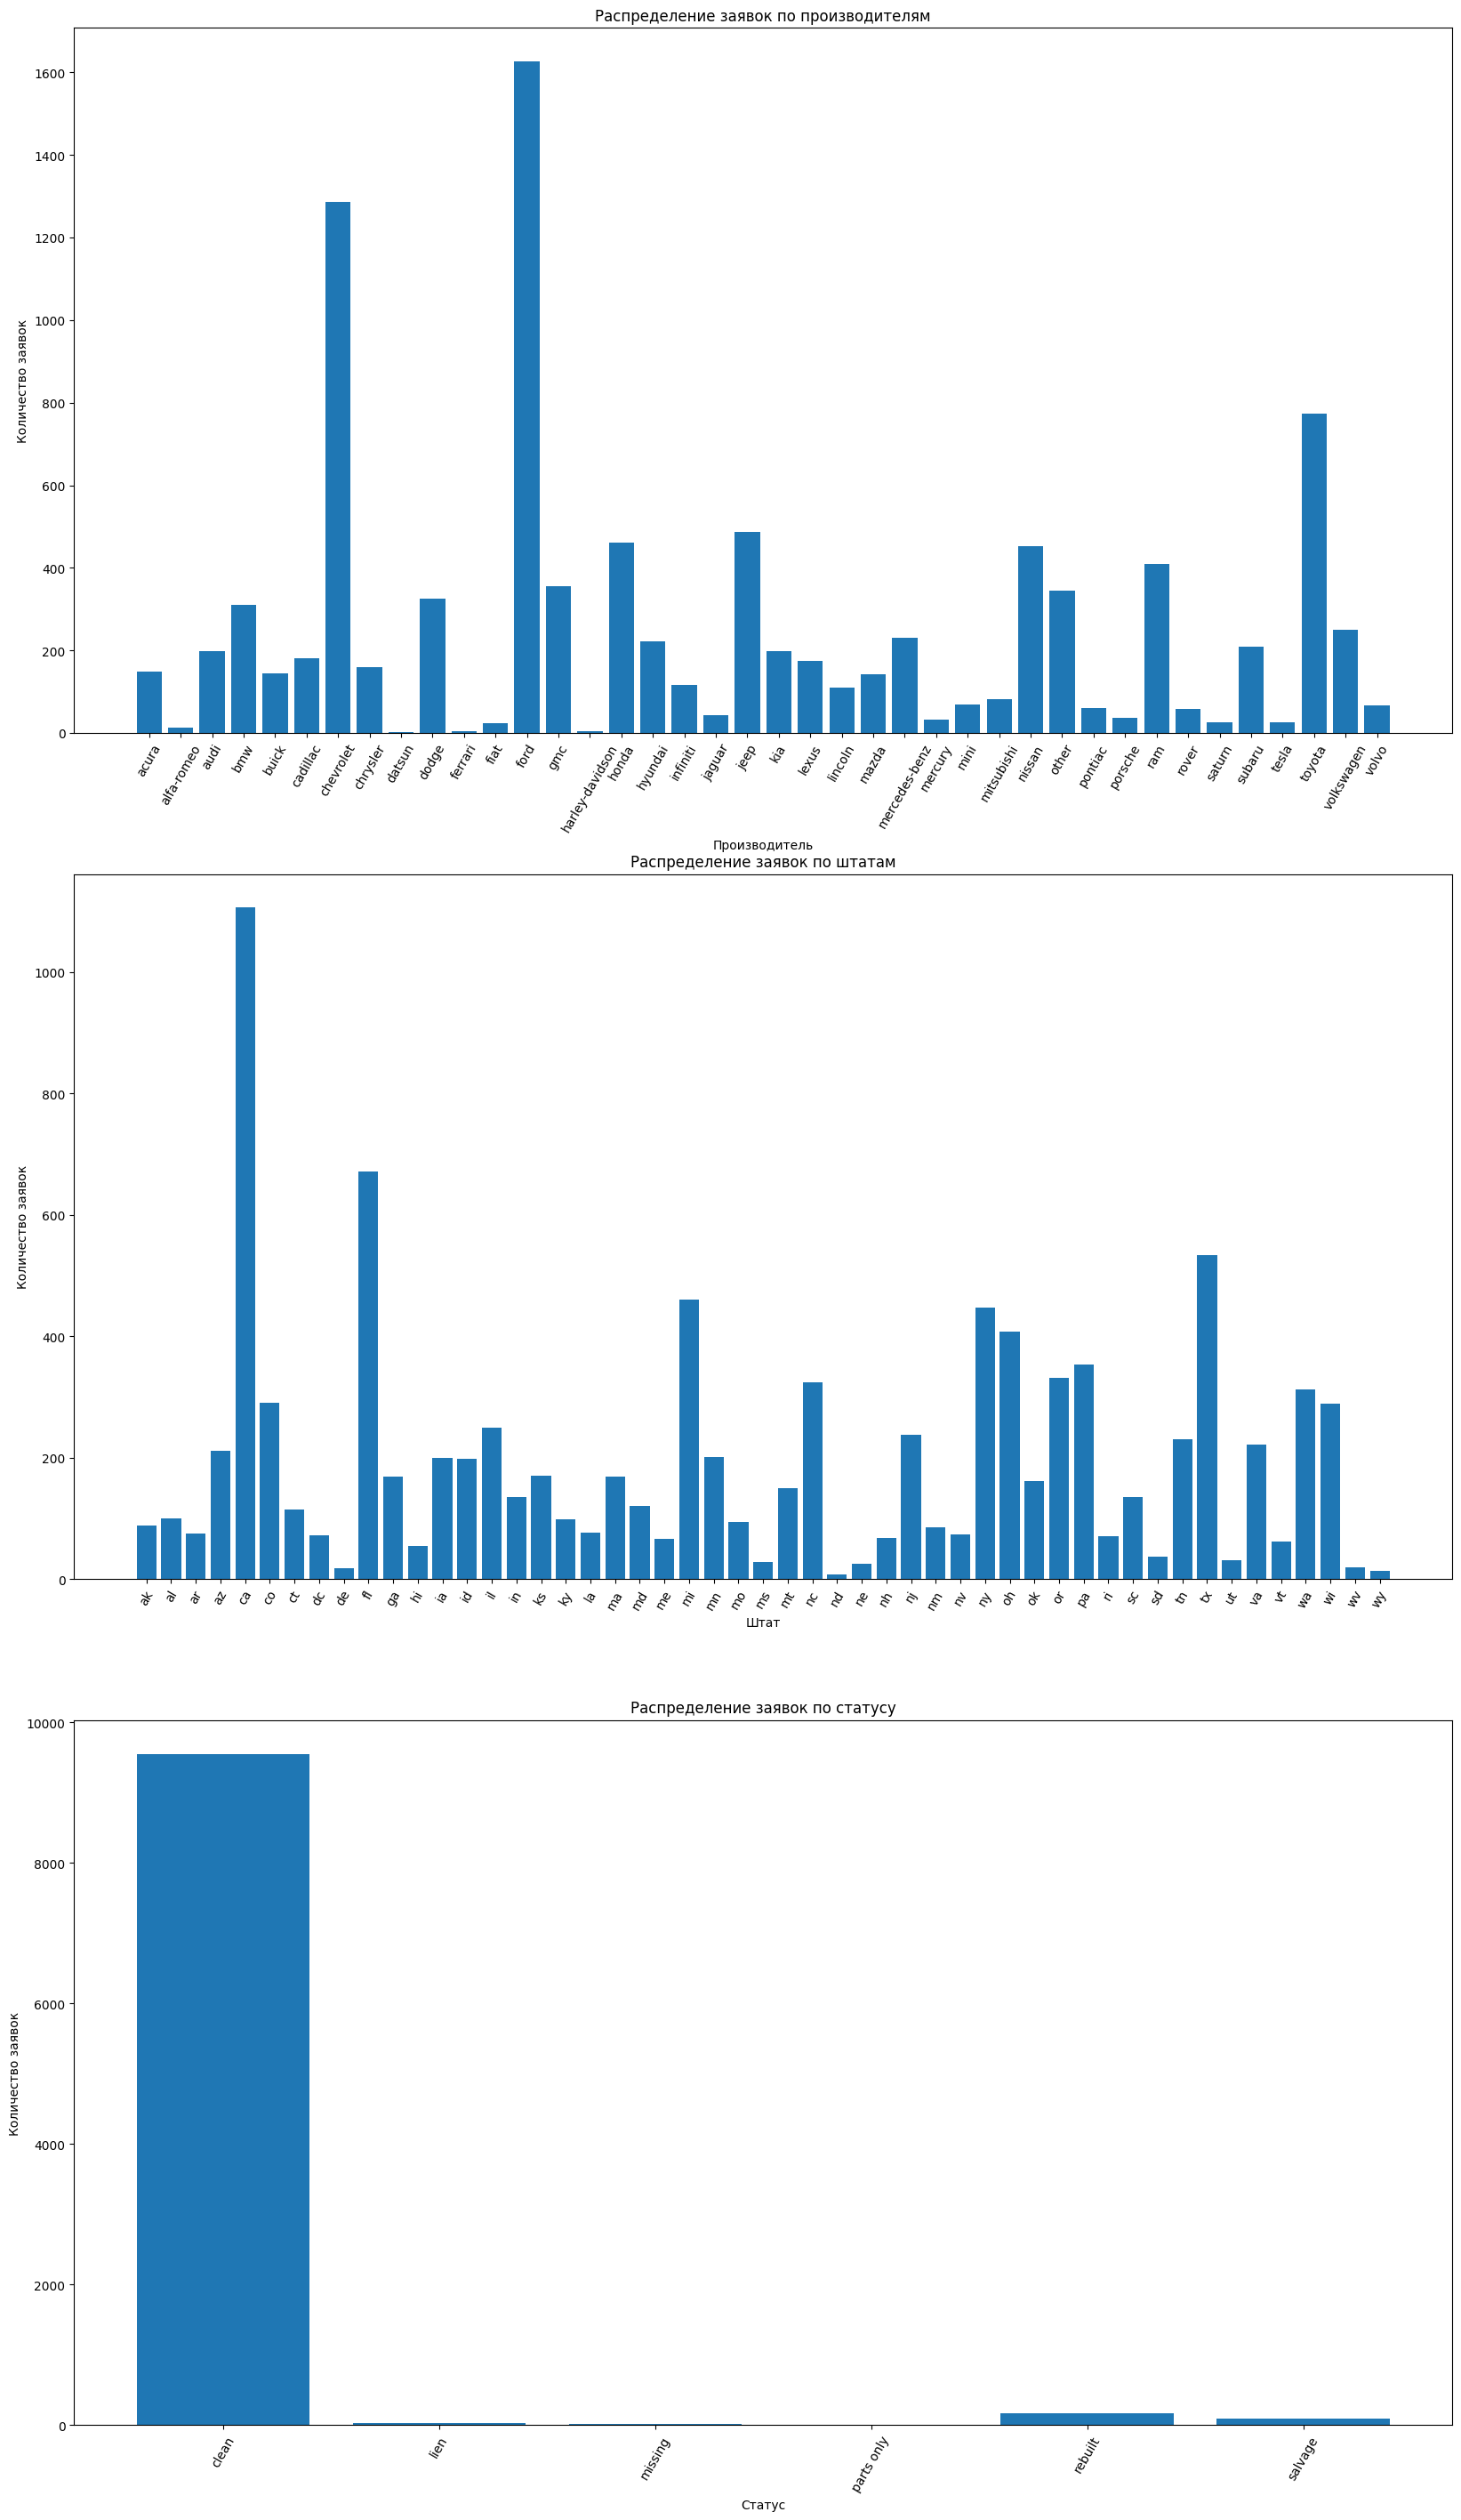

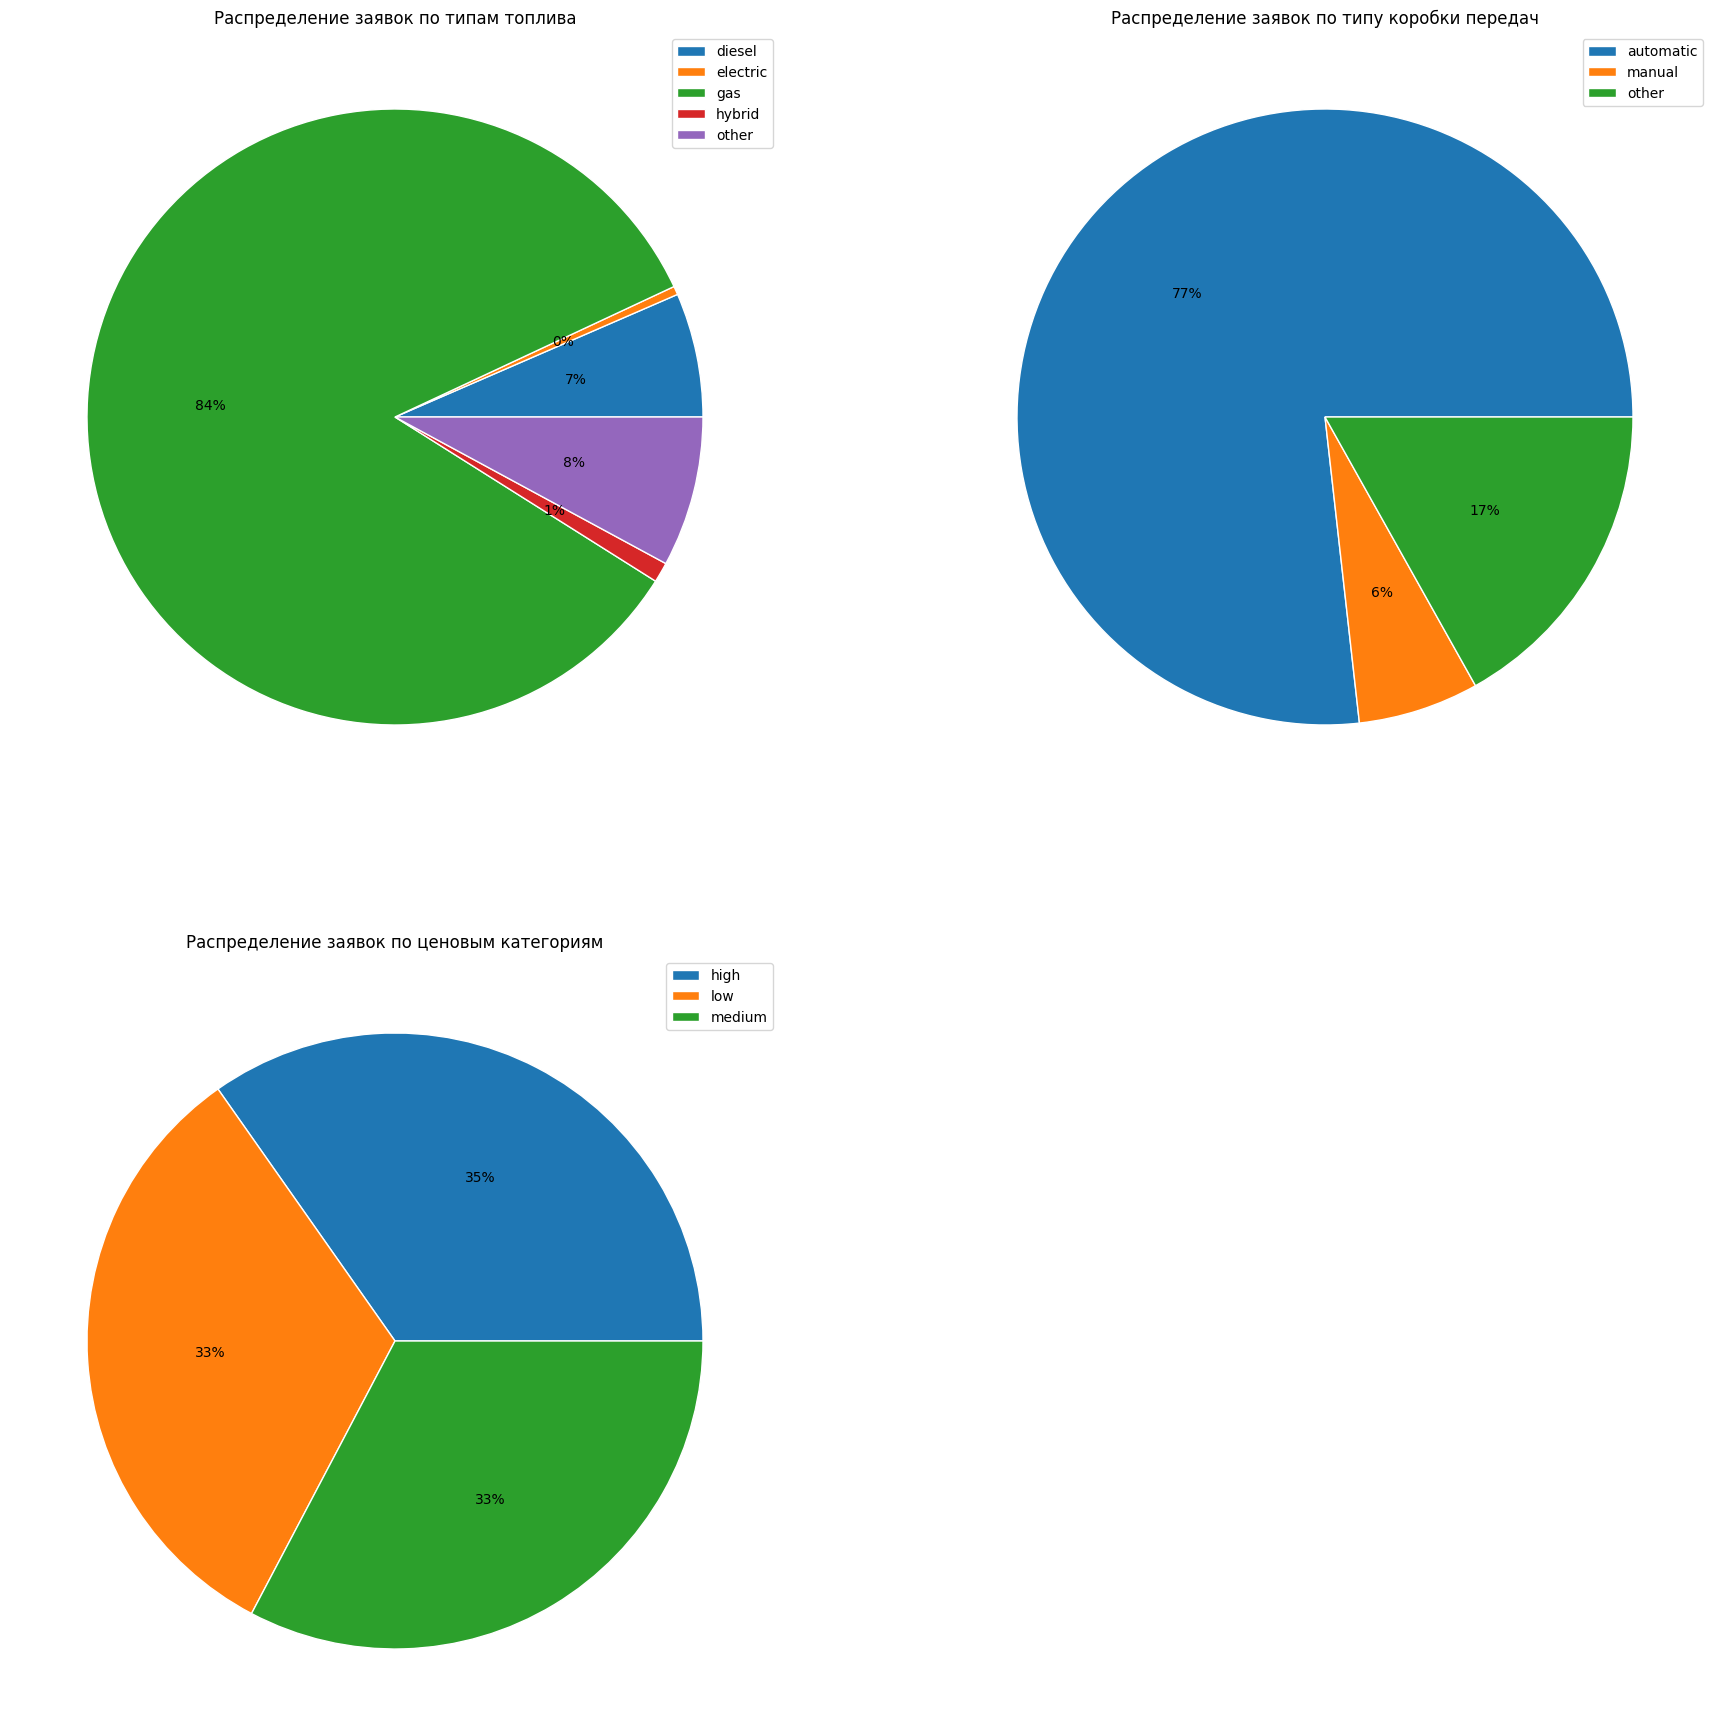

In [10]:
columns_a = ["manufacturer", "state", "title_status"]
aliases_a = ["производителям", "штатам", "статусу"]
x_names_a = ["Производитель", "Штат", "Статус"]

draw_categorial_boxplot(df, columns_a, aliases_a, x_names_a)

columns_b = ['fuel', 'transmission', 'price_category']          
aliases_b = ['типам топлива', 'типу коробки передач', 'ценовым категориям'] 
draw_categorial_pie(df, columns_b, aliases_b)

# Подзадача 5
Исследуйте зависимости в данных

Кореляция момент

In [11]:
import seaborn as sns

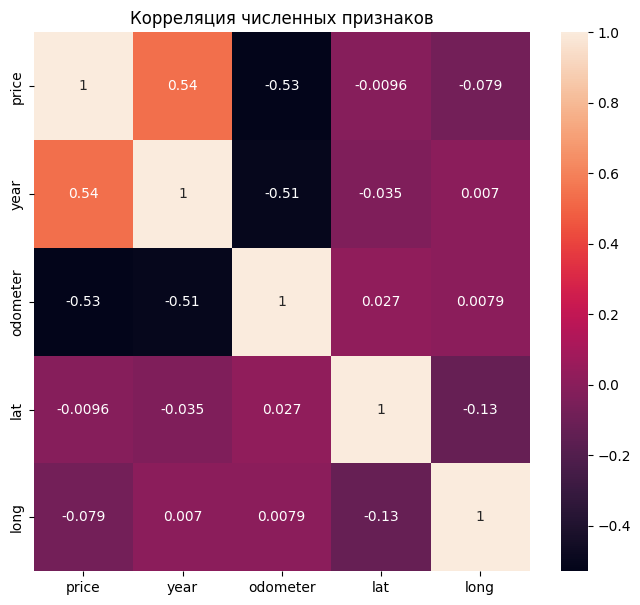

In [12]:
plt.figure(figsize=(8, 7))

sns.heatmap(df[['price', 'year', 'odometer', 'lat', 'long']].corr(), annot=True)

plt.title('Корреляция численных признаков')

plt.show()

Определённая связь имеется между парами:

цена-год_выпуска

пробег-год_выпуска

цена-пробег

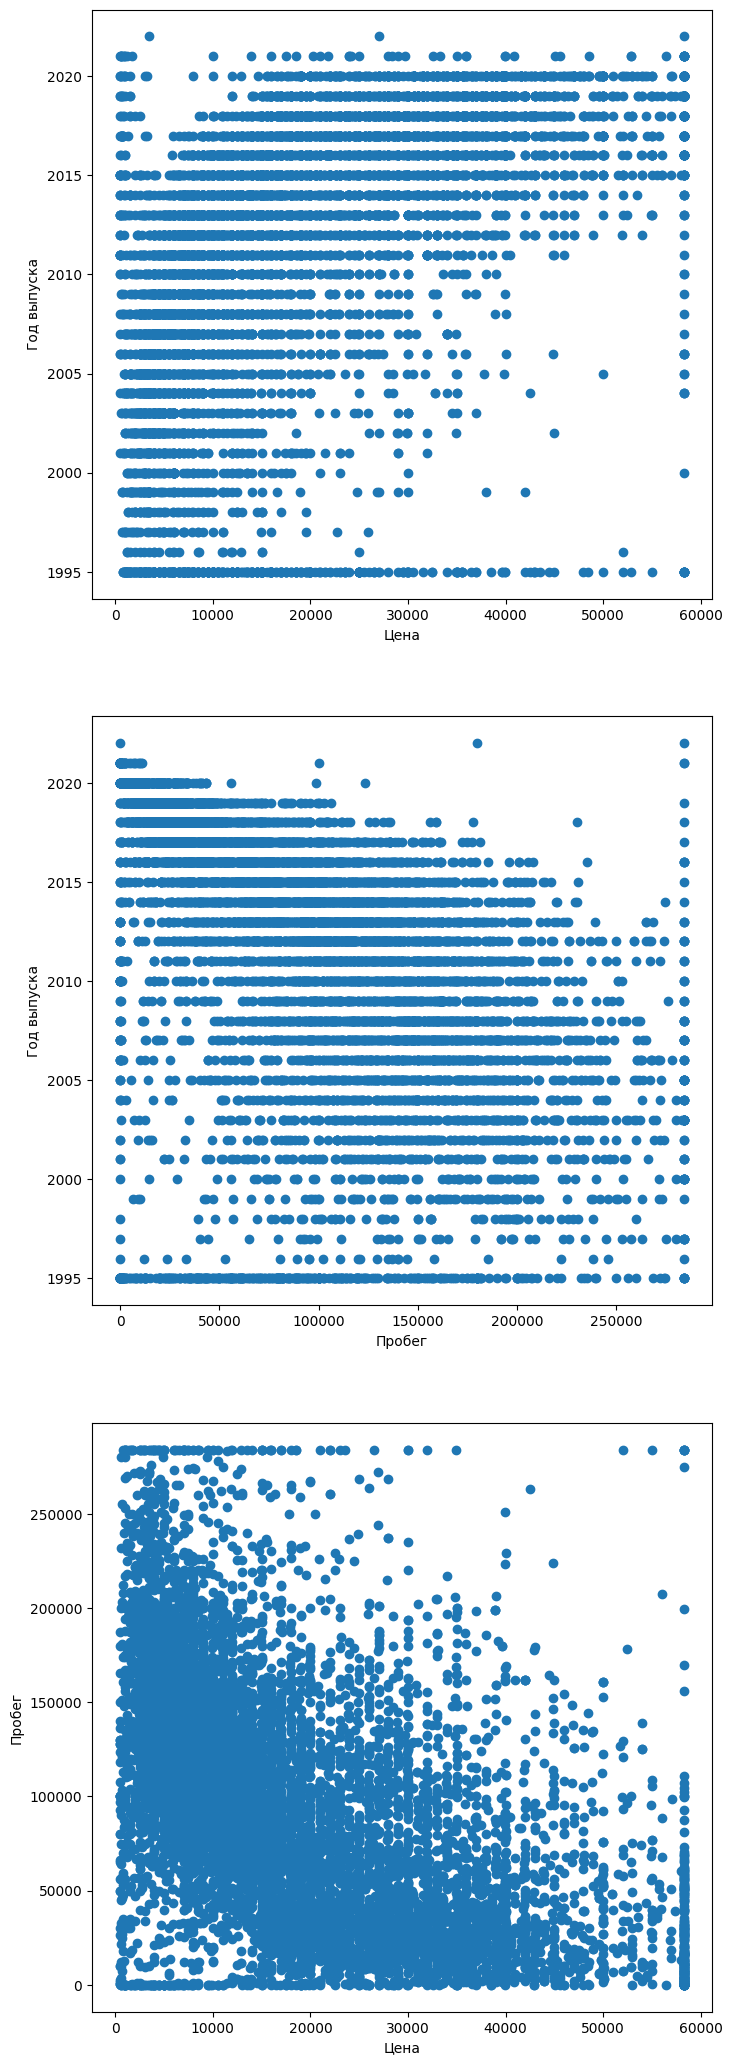

In [13]:
pairs = [('price', 'year'), ('odometer', 'year'), ('price', 'odometer')]
labels = [('Цена', 'Год выпуска'), ('Пробег', 'Год выпуска'), ('Цена', 'Пробег')]

plt.figure(figsize=(8, 26))

for i in range(len(pairs)):
    plt.subplot(len(pairs), 1, i + 1)

    col1, col2 = pairs[i]
    plt.scatter(df[col1], df[col2])

    label1, label2 = labels[i]
    plt.xlabel(label1)
    plt.ylabel(label2)

plt.show()

Пробег выше у старых авто.

Цена выше для новых авто без пробега.